In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


/home/yoh010/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/yoh010/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Corelation between Wage v.s. housing price

In [2]:
df = pd.read_csv('./filtered_housing_prices.csv')

price_mean = df.loc[:,'Mean of Median of housing price']
states_to_keep = df.loc[:,'State']
states_to_keep = states_to_keep.values
states_to_keep = states_to_keep.tolist()

df = pd.read_csv('./filtered_state_M2022_dl.csv')


Mean_annual_wage = []

for index, row in df.iterrows():
#     print(f"Row {index}:")
#     print(row)
    if row['OCC_CODE'] == '00-0000' and row['AREA_TITLE'] in  states_to_keep:
        Mean_annual_wage.append(row['A_MEAN'])


In [3]:
# plt.show()
correlation_coefficients = np.corrcoef(Mean_annual_wage, price_mean)
print('correlation_coefficients:\n', correlation_coefficients)

covariance = np.cov(Mean_annual_wage, price_mean)

print('covariance:\n', covariance[1][0])

correlation_coefficients:
 [[1.         0.65362697]
 [0.65362697 1.        ]]
covariance:
 863022131.8411645


#### Because covariance is not equal to 1, it means there are some places has higher wage with lower housing price

### covariance between the ratio of  different occupations and housing price

In [4]:
# 11-0000  Management Occupations
# 13-0000  Business and Financial Operations Occupations
# 15-0000  Computer and Mathematical Occupations
# 17-0000  Architecture and Engineering Occupations
# 19-0000  Life, Physical, and Social Science Occupations
# 21-0000  Community and Social Service Occupations
# 23-0000  Legal Occupations
# 25-0000  Educational Instruction and Library Occupations
# 27-0000  Arts, Design, Entertainment, Sports, and Media Occupations
# 29-0000  Healthcare Practitioners and Technical Occupations
# 31-0000  Healthcare Support Occupations
# 33-0000  Protective Service Occupations
# 35-0000  Food Preparation and Serving Related Occupations
# 37-0000  Building and Grounds Cleaning and Maintenance Occupations
# 39-0000  Personal Care and Service Occupations
# 41-0000  Sales and Related Occupations
# 43-0000  Office and Administrative Support Occupations
# 45-0000  Farming, Fishing, and Forestry Occupations
# 47-0000  Construction and Extraction Occupations
# 49-0000  Installation, Maintenance, and Repair Occupations
# 51-0000  Production Occupations
# 53-0000  Transportation and Material Moving Occupations
Mang = []
Busi_Fina = []
Comp_Math = []
Arch_Eng = []
Phys = []
Comm = []
Legal = []
Edu = []
Art_Entertain = []
Health_Pract = []
Health_Sup = []
Protect = []
Food = []
Cleaning = []
Personal_care = []
Sales = []
Office = []
Farm_Fish = []
Construct_Exstruct = []
Maintain_Repair = []
Production = []
Transport = []

for index, row in df.iterrows():
    if row['AREA_TITLE'] in states_to_keep:
        if row['TOT_EMP'] == '**':
            tmp = 0
        else:
            tmp = int(row['TOT_EMP'])
    
        if row['OCC_CODE'] == '00-0000':
            total_emp = tmp
        elif row['OCC_CODE'] == '11-0000':
            Mang.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '13-0000':
            Busi_Fina.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '15-0000':
            Comp_Math.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '17-0000':
            Arch_Eng.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '19-0000':
            Phys.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '21-0000':
            Comm.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '23-0000':
            Legal.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '25-0000':
            Edu.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '27-0000':
            Art_Entertain.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '29-0000':
            Health_Pract.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '31-0000':
            Health_Sup.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '33-0000':
            Protect.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '35-0000':
            Food.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '37-0000':
            Cleaning.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '39-0000':
            Personal_care.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '41-0000':
            Sales.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '43-0000':
            Office.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '45-0000':
            Farm_Fish.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '47-0000':
            Construct_Exstruct.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '49-0000':
            Maintain_Repair.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '51-0000':
            Production.append(float(tmp) / total_emp)
        elif row['OCC_CODE'] == '53-0000':
            Transport.append(float(tmp) / total_emp)




In [5]:
data_dict = {
    'State': states_to_keep,
    'Mean of Median of housing price': price_mean,
    'Management': Mang,
    'Business_Finance': Busi_Fina,
    'Computer_Math': Comp_Math,
    'Architecture_Eng': Arch_Eng,
    'Life_Physical_Social': Phys,
    'Community': Comm,
    'Legal': Legal,
    'Education': Edu,
    'Arts_Entertainment': Art_Entertain,
    'Healthcare_Practitioners': Health_Pract,
    'Healthcare_Support': Health_Sup,
    'Protective_Service': Protect,
    'Food_Preparation': Food,
    'Cleaning_Maintenance': Cleaning,
    'Personal_Care': Personal_care,
    'Sales': Sales,
    'Office_Administrative': Office,
    'Farming_Fishing': Farm_Fish,
    'Construction_Extraction': Construct_Exstruct,
    'Maintenance_Repair': Maintain_Repair,
    'Production': Production,
    'Transportation': Transport
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data_dict)

# Display the resulting DataFrame
df

,State,Mean of Median of housing price,Management,Business_Finance,Computer_Math,Architecture_Eng,Life_Physical_Social,Community,Legal,Education,...,Food_Preparation,Cleaning_Maintenance,Personal_Care,Sales,Office_Administrative,Farming_Fishing,Construction_Extraction,Maintenance_Repair,Production,Transportation
0,Alabama,215150.000000,0.052036,0.047784,0.025943,0.022789,0.005868,0.010449,0.005669,0.050299,...,0.083024,0.026377,0.016008,0.097620,0.117295,0.003368,0.043628,0.051397,0.102121,0.104701
1,Alaska,334833.333333,0.073862,0.043873,0.016497,0.023031,0.022214,0.023031,0.007252,0.063049,...,0.083303,0.032537,0.020679,0.069615,0.127242,0.001764,0.062461,0.054425,0.032701,0.094051
2,Arizona,307670.000000,0.071150,0.068109,0.037742,0.016948,0.006485,0.014583,0.007376,0.047598,...,0.090516,0.027754,0.017750,0.089048,0.143610,0.003658,0.047612,0.041671,0.039642,0.089197
3,Arkansas,202572.727273,0.068262,0.049982,0.019669,0.009619,0.005435,0.011399,0.005573,0.057765,...,0.085819,0.027241,0.013925,0.093082,0.119121,0.004103,0.038624,0.046480,0.091238,0.115181
4,California,673135.714286,0.072226,0.067512,0.039436,0.018627,0.011203,0.018694,0.008313,0.056828,...,0.085002,0.028265,0.019353,0.082244,0.113197,0.012683,0.038802,0.030557,0.046654,0.087161
5,Colorado,540875.000000,0.053976,0.089339,0.047560,0.025314,0.012988,0.017304,0.009359,0.052866,...,0.092112,0.029432,0.021468,0.106397,0.116631,0.001894,0.051041,0.037652,0.036513,0.074378
6,Connecticut,360200.000000,0.085602,0.061042,0.029868,0.020515,0.007380,0.020815,0.008875,0.073490,...,0.075734,0.033061,0.023769,0.083855,0.131406,0.000460,0.030230,0.033196,0.054937,0.075586
7,Delaware,340566.666667,0.048605,0.075300,0.037496,0.013523,0.014006,0.017409,0.011284,0.059999,...,0.090229,0.033808,0.021273,0.097341,0.136616,0.002349,0.038023,0.035543,0.037957,0.087418
8,District of Columbia,711100.000000,0.142236,0.166379,0.070604,0.017289,0.029824,0.015579,0.059445,0.043345,...,0.065604,0.026143,0.014231,0.030563,0.089341,0.000406,0.017926,0.014506,0.007492,0.024404
9,Florida,347936.585366,0.057978,0.071101,0.029650,0.012547,0.005748,0.012738,0.011298,0.042943,...,0.099701,0.033864,0.021492,0.108445,0.142540,0.002132,0.046885,0.042184,0.032702,0.087704


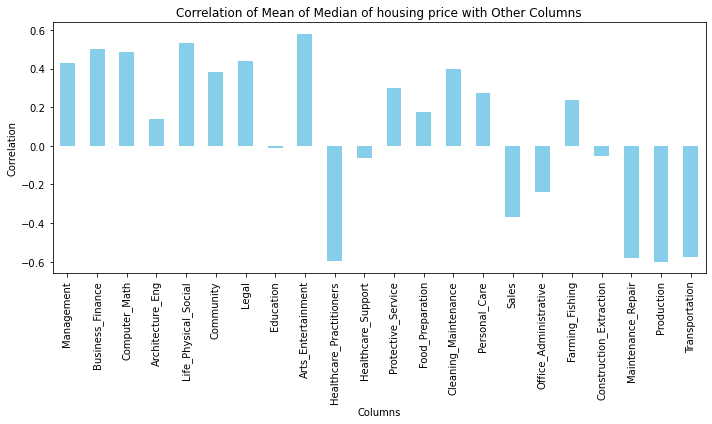

In [6]:
import seaborn as sns

price_column = 'Mean of Median of housing price'  # Replace 'Price' with your actual column name

df_corr = df.drop('State', axis=1)
# Calculate the correlation of 'Price' with other columns
correlation_with_price = df_corr.corr()[price_column].drop(price_column)

# Plotting the correlation values
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
correlation_with_price.plot(kind='bar', color='skyblue')
plt.title(f'Correlation of {price_column} with Other Columns')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

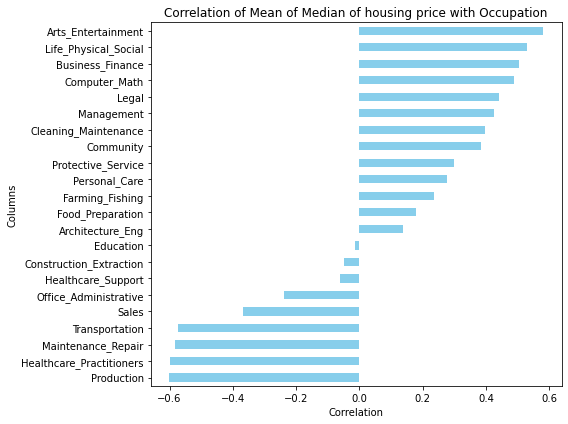

In [12]:
import seaborn as sns

price_column = 'Mean of Median of housing price'  # Replace 'Price' with your actual column name

df_corr = df.drop('State', axis=1)
# Calculate the correlation of 'Price' with other columns
correlation_with_price = df_corr.corr()[price_column].drop(price_column)

# Plotting the correlation values as a horizontal bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
correlation_with_price.sort_values().plot(kind='barh', color='skyblue')  # Horizontal bar plot
plt.title(f'Correlation of {price_column} with Occupation')
plt.ylabel('Columns')  # Y-axis represents columns now
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()

In [11]:
correlation_with_price

Management                  0.426007
Business_Finance            0.502344
Computer_Math               0.487182
Architecture_Eng            0.137310
Life_Physical_Social        0.530178
Community                   0.382745
Legal                       0.440668
Education                  -0.013416
Arts_Entertainment          0.579487
Healthcare_Practitioners   -0.597833
Healthcare_Support         -0.061471
Protective_Service          0.297770
Food_Preparation            0.177517
Cleaning_Maintenance        0.397851
Personal_Care               0.275291
Sales                      -0.368231
Office_Administrative      -0.237765
Farming_Fishing             0.235871
Construction_Extraction    -0.050389
Maintenance_Repair         -0.582020
Production                 -0.600460
Transportation             -0.574373
Name: Mean of Median of housing price, dtype: float64